# Clustering

In this assignment, you will implement a K-Means Clustering algorithm from scratch and compare the results to existing sklearn algorithm.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Question 1.1: Write a method that determine Labels from Points and ClusterCentroids, and return a list of a label for each point

In [2]:
def FindLabelOfClosest(Points, ClusterCentroids): # determine Labels from Points and ClusterCentroids
    #TODO
    NumberOfClusters, NumberOfDimensions = ClusterCentroids.shape # dimensions of the initial Centroids

    NumberOfPoints, NumberOfDimensions = Points.shape
    Labels = []
    for PointNumber in range(NumberOfPoints): # assign labels to all data points  
        Distances = [] # centroid distances
        
        for ClusterNumber in range(NumberOfClusters): # for each cluster
            centroid = ClusterCentroids[ClusterNumber]
            point = Points[PointNumber]
            # Get distances for each cluster
            Distances.append(np.linalg.norm(point - centroid))           
        Labels.append(np.argmin(Distances))
    return Labels # return the a label for each point


In [3]:
points = np.array([
    [5, 3],
    [10, 5],
    [54, 30],
    [-10, -10]
])

centroids = np.array([
    [0, 0],
    [10, 10],
    [50, 50]
])

FindLabelOfClosest(points, centroids)

[0, 1, 2, 0]

Question 1.2: Write a method that determine centroid of Points with the same label

In [4]:
def CalculateClusterCentroid(Points, Labels): # determine centroid of Points with the same label
    #TODO
    ClusterLabels = np.unique(Labels) # names of labels
    NumberOfPoints, NumberOfDimensions = Points.shape
    ClusterCentroids = np.empty((len(ClusterLabels), NumberOfDimensions))
    for ClusterNumber in ClusterLabels: # for each cluster
        # get mean for each label
        cluster_points = Points[Labels == ClusterNumber]
        ClusterCentroids[ClusterNumber, :] = np.mean(cluster_points, axis=0)
    return ClusterCentroids # return the a label for each point

Question 1.3: Put it all together as such. K-means algorithm partitions the input data into K clusters by iterating between the following two steps:
- Compute the cluster center by computing the arithmetic mean of all the points belonging to the cluster.
- Assign each point to the closest cluster center.

In [52]:
def KMeans(Points, ClusterCentroidGuesses):
    #TODO
    ClusterCentroids = ClusterCentroidGuesses.copy()
    Labels_Previous = None
    # Get starting set of labels
    Labels = FindLabelOfClosest(Points, ClusterCentroids)
    while not np.array_equal(Labels, Labels_Previous):
        # Re-calculate cluster centers based on new set of labels
        ClusterCentroids = CalculateClusterCentroid(Points, Labels)
        Labels_Previous = Labels.copy() # Must make a deep copy
        # Determine new labels based on new cluster centers
        Labels = FindLabelOfClosest(Points, ClusterCentroids)
    return Labels, ClusterCentroids

In [6]:
StoreTxn = pd.read_csv("./Superstore Transaction data.csv")
StoreTxn['Order Date'] = pd.to_datetime(StoreTxn['Order Date'] )
StoreTxn.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
StoreTxn.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Extract RFM features from the transaction data:
- Recency: when was the last purchase they made
- Frequency: how often do they make a purchase in the last month (or any given window you choose)
- Monetary: how much money did they spend in the last month

Question 2.1:
- Use groupby to summarize the quantity and dollar columns by user_id and date
- Name the aggregated data txn_agg
- Reset the index for txn_agg to the default and user_id and date to dataframe columns
- Confirm changes

In [8]:
#TODO #Summarize quantity and dollar by user_id - date.
agg = {
    'Quantity': 'sum',
    'Sales': 'sum'
}
txn_agg = StoreTxn.groupby(['Customer ID', 'Order Date']).agg(agg).reset_index(drop=False)
txn_agg.head(10)

,Customer ID,Order Date,Quantity,Sales
0,AA-10315,2014-03-31,4,726.548
1,AA-10315,2014-09-15,5,29.500
2,AA-10315,2015-10-04,2,26.960
3,AA-10315,2016-03-03,14,4406.072
4,AA-10315,2017-06-29,5,374.480
5,AA-10375,2014-04-21,5,16.520
6,AA-10375,2014-10-24,3,34.272
7,AA-10375,2015-02-03,5,178.370
8,AA-10375,2015-05-08,2,5.248
9,AA-10375,2015-11-13,6,84.960


Question 2.2:Using the aggregated data, obtain recency, frequency and monetary features for both dollar and quantity. Use a 7-day moving window for frequency and monetary. Call your new features last_visit_ndays (recency) quantity_roll_sum_7D (frequency) and dollar_roll_sum_7D (monetary)

In [9]:
#TODO # Group the data by user_id and calculate lag as the difference between the current and previous date (lag by one period)

last = txn_agg.groupby('Customer ID')['Order Date'].diff().dt.days
last = pd.DataFrame(last)
last = last.rename(columns = {'Order Date' : 'last_visit_ndays'}) # Name the lagged date values last_visit_ndays
print(last.head(10), end='\n\n')

#TODO # Group the data by user_id.  Apply a 7 day offset to implement a moving 7-day window totaling quantity and dollars sold within each time window.
roll = txn_agg.groupby('Customer ID').rolling('7d', on='Order Date').agg(agg).reset_index()
roll = roll.rename(columns = {'Quantity' : 'quantity_roll_sum_7D', 'Sales' : 'sales_roll_sum_7D'}) # Name the resulting data values quantity_roll_sum_7D and dollar_roll_sum_7D
print(roll.head(10), end='\n\n')

   last_visit_ndays
0               NaN
1             168.0
2             384.0
3             151.0
4             483.0
5               NaN
6             186.0
7             102.0
8              94.0
9             189.0

  Customer ID Order Date  quantity_roll_sum_7D  sales_roll_sum_7D
0    AA-10315 2014-03-31                   4.0            726.548
1    AA-10315 2014-09-15                   5.0             29.500
2    AA-10315 2015-10-04                   2.0             26.960
3    AA-10315 2016-03-03                  14.0           4406.072
4    AA-10315 2017-06-29                   5.0            374.480
5    AA-10375 2014-04-21                   5.0             16.520
6    AA-10375 2014-10-24                   3.0             34.272
7    AA-10375 2015-02-03                   5.0            178.370
8    AA-10375 2015-05-08                   2.0              5.248
9    AA-10375 2015-11-13                   6.0             84.960



Question 2.3: Combine all three features into a single DataFrame and call it txn_roll

In [10]:
#TODO # Inner join between roll (frequency and monetary fields) and last (recency fields) to create churn_roll.  Join based on index which works given that both dataframes are sorted by user_id and date.
txn_roll = roll.merge(last, how='inner', left_index=True, right_index=True)

print(txn_roll.dtypes, end='\n\n')
txn_roll.head(10)


Customer ID                     object
Order Date              datetime64[ns]
quantity_roll_sum_7D           float64
sales_roll_sum_7D              float64
last_visit_ndays               float64
dtype: object



,Customer ID,Order Date,quantity_roll_sum_7D,sales_roll_sum_7D,last_visit_ndays
0,AA-10315,2014-03-31,4.0,726.548,NaN
1,AA-10315,2014-09-15,5.0,29.500,168.0
2,AA-10315,2015-10-04,2.0,26.960,384.0
3,AA-10315,2016-03-03,14.0,4406.072,151.0
4,AA-10315,2017-06-29,5.0,374.480,483.0
5,AA-10375,2014-04-21,5.0,16.520,NaN
6,AA-10375,2014-10-24,3.0,34.272,186.0
7,AA-10375,2015-02-03,5.0,178.370,102.0
8,AA-10375,2015-05-08,2.0,5.248,94.0
9,AA-10375,2015-11-13,6.0,84.960,189.0


Question 2.4: Use fillna to replace missing values for recency with a large value like 100 days (whatever makes business sense). HINT: You can use pd.Timedelta('100 days') to set the value.

In [11]:
txn_roll['last_visit_ndays'] = txn_roll['last_visit_ndays'].fillna(1000) #TODO # Replace missing recency values with 1000 days
txn_roll.head(10)

,Customer ID,Order Date,quantity_roll_sum_7D,sales_roll_sum_7D,last_visit_ndays
0,AA-10315,2014-03-31,4.0,726.548,1000.0
1,AA-10315,2014-09-15,5.0,29.500,168.0
2,AA-10315,2015-10-04,2.0,26.960,384.0
3,AA-10315,2016-03-03,14.0,4406.072,151.0
4,AA-10315,2017-06-29,5.0,374.480,483.0
5,AA-10375,2014-04-21,5.0,16.520,1000.0
6,AA-10375,2014-10-24,3.0,34.272,186.0
7,AA-10375,2015-02-03,5.0,178.370,102.0
8,AA-10375,2015-05-08,2.0,5.248,94.0
9,AA-10375,2015-11-13,6.0,84.960,189.0


Question 2.5: Merge the aggregated data churn_agg with the RFM features in churn_roll. You can use the merge method to do this with the right keys specified.

In [12]:
txn_rfm = txn_agg.merge(txn_roll, how='inner', on=['Customer ID', 'Order Date'])
txn_rfm.head(10)

,Customer ID,Order Date,Quantity,Sales,quantity_roll_sum_7D,sales_roll_sum_7D,last_visit_ndays
0,AA-10315,2014-03-31,4,726.548,4.0,726.548,1000.0
1,AA-10315,2014-09-15,5,29.500,5.0,29.500,168.0
2,AA-10315,2015-10-04,2,26.960,2.0,26.960,384.0
3,AA-10315,2016-03-03,14,4406.072,14.0,4406.072,151.0
4,AA-10315,2017-06-29,5,374.480,5.0,374.480,483.0
5,AA-10375,2014-04-21,5,16.520,5.0,16.520,1000.0
6,AA-10375,2014-10-24,3,34.272,3.0,34.272,186.0
7,AA-10375,2015-02-03,5,178.370,5.0,178.370,102.0
8,AA-10375,2015-05-08,2,5.248,2.0,5.248,94.0
9,AA-10375,2015-11-13,6,84.960,6.0,84.960,189.0


Question 3.1: Train the k-means algorithm you developed earlier on the RFM features using  𝑘=4 . What are the cluster centroids? The cluster centroids should be reported in the original scale, not the standardized scale.

In [13]:
from sklearn.preprocessing import StandardScaler

In [43]:
# we have to scale the data for the actual fitting, though we can print on original scale
scaler = StandardScaler()
columns = ['quantity_roll_sum_7D', 'sales_roll_sum_7D', 'last_visit_ndays']
data = scaler.fit_transform(txn_rfm[columns])
data.shape

(4992, 3)

In [56]:
k = 4
ClusterCentroidGuesses = np.empty((k, data.shape[1]))
for i in range(k):
    ClusterCentroidGuesses[i] = np.array(
        [np.random.randint(data[:, i].min(), data[:, i].max())
         for i in range(data.shape[1])]
    )

Labels, ClusterCentroids = KMeans(data, ClusterCentroidGuesses)

# first let's see the scaled centroids
ClusterCentroids

array([[ 1.49479168e+00,  1.76217236e+01,  4.09427208e-01],
       [-4.41314952e-01, -2.62072600e-01,  8.24995187e-03],
       [ 1.60253407e+00,  3.60423863e+00,  8.47016031e-04],
       [ 1.34384269e+00,  3.37661088e-01, -3.13940556e-02]])

In [59]:
# then we can see the original values with 
np.set_printoptions(suppress=True)
scaler.inverse_transform(ClusterCentroids)

array([[   17.5       , 17441.7265    ,   457.75      ],
       [    4.96693996,   218.42005655,   320.47580005],
       [   18.19745223,  3941.93951656,   317.94267516],
       [   16.52285714,   796.00420038,   306.91047619]])

Question 3.2: Pick few pairs and plot scatter plots along with cluster centroids.

In [67]:
sample_inds = np.random.randint(0, data.shape[0], 250)
sample_data = data[sample_inds]
sample_labels = np.array(Labels)[sample_inds]

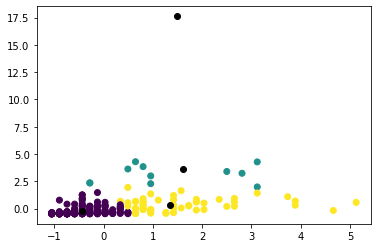

In [73]:
# quantity (X) vs sales (Y)
plt.scatter(
    x=sample_data[:, 0],
    y=sample_data[:, 1],
    c=sample_labels
)
# centroids
plt.scatter(
    x=ClusterCentroids[:, 0],
    y=ClusterCentroids[:, 1],
    c='black'
)

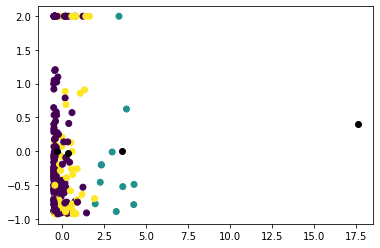

In [74]:
# sales (X) vs last visit (Y)
plt.scatter(
    x=sample_data[:, 1],
    y=sample_data[:, 2],
    c=sample_labels
)

# centroids
plt.scatter(
    x=ClusterCentroids[:, 1],
    y=ClusterCentroids[:, 2],
    c='black'
)

[Bonus] Question 4: Train k-means model using sklearn library and compare results to the model developed above.

In [57]:
from sklearn.cluster import KMeans as KMeans_SKL

# if we use the same initialization, they will converge to almost identical positions
model = KMeans_SKL(n_clusters=k, init=ClusterCentroidGuesses, n_init=1)
model.fit(data)
model.cluster_centers_

array([[ 1.49479168e+00,  1.76217236e+01,  4.09427208e-01],
       [-4.40452467e-01, -2.61395092e-01,  9.58578405e-03],
       [ 1.60253407e+00,  3.60423863e+00,  8.47016031e-04],
       [ 1.34754835e+00,  3.37502929e-01, -3.63794292e-02]])

In [60]:
scaler.inverse_transform(model.cluster_centers_)

array([[   17.5       , 17441.7265    ,   457.75      ],
       [    4.97252312,   219.07254314,   320.932893  ],
       [   18.19745223,  3941.93951656,   317.94267516],
       [   16.54684512,   795.85188184,   305.20458891]])

Question 5: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.

The actual implementation of KMeans was very straightforward. I was also pleased to see that my model reached almost the exact same centroids as the sklearn implementation, provided I used the same initialization with each. However, there were very small differences. I am curious why this is the case. If I had to guess, I'd say it's related to the way that sklearn breaks ties, since the differences are so minor.

I think the trickiest part of this particular problem is with feature engineering rather than model construction. Even with data standardization, there was a cluster dominated by outliers that went way off away from the mass of the data. This may be in part due to the arbitrary value (1000) used to fill NA values. 